In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df[df["job_country"] == "United States"]

In [13]:
df_skills = df_US.explode("job_skills")

df_skills[["job_title_short", "job_skills"]]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [24]:
df_skills_count = df_skills.groupby(["job_title_short", "job_skills"]).size()
df_skills_count = df_skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1281,Senior Data Analyst,tidyr,1
1313,Senior Data Engineer,asp.net core,1
1794,Software Engineer,planner,1
1795,Software Engineer,plotly,1


In [25]:
job_titles = df_skills_count["job_title_short"].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

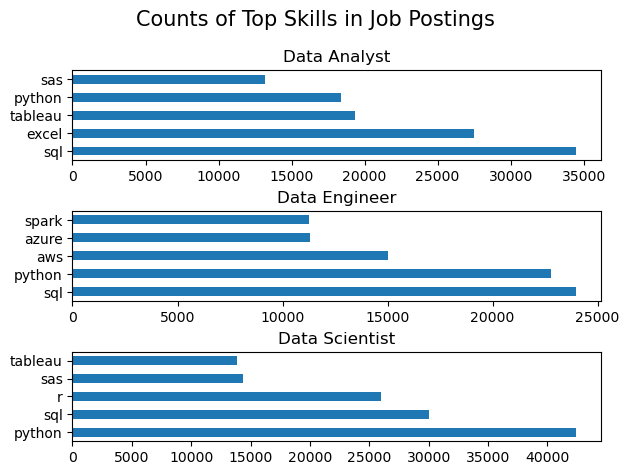

In [28]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    ax[i].invert_yaxis
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()

In [30]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [38]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how="left", on="job_title_short")
df_skills_perc["skill_percent"] = 100 * (df_skills_perc["skill_count"] / df_skills_perc["jobs_total"])
df_skills_perc

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Analyst,tidyr,1,11791,0.008481
1866,Senior Data Engineer,asp.net core,1,9289,0.010765
1867,Software Engineer,planner,1,1814,0.055127
1868,Software Engineer,plotly,1,1814,0.055127


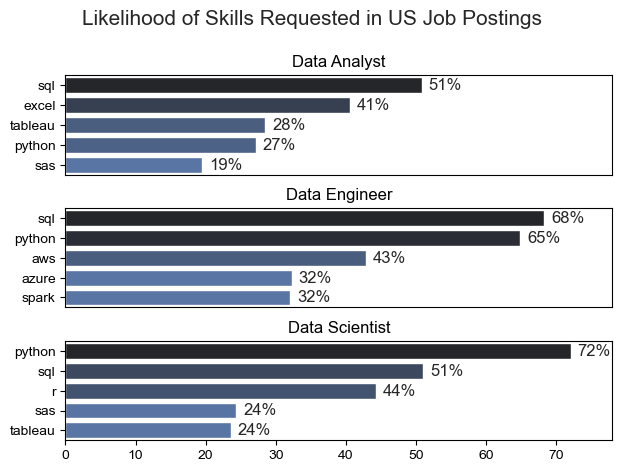

In [44]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()